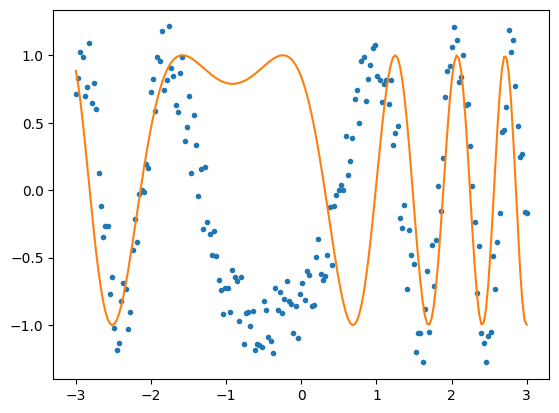

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 200)
y = []

# Generate the noisy data points
for i in range(200):
    y.append(np.sin(-(1.5 * x[i] ** 2 + 1.2 * x[i] + 2.1)) + np.random.uniform(-0.3, 0.3))
y = np.array(y)

plt.plot(x, y, '.')

# Define the function you want to fit
def func(a, b, c, x):
    return np.sin(-(a * x ** 2 + b * x + c))

# Define the loss function
def loss_func(params, x, y):
    return ((func(params[0], params[1], params[2], x) - y) ** 2).sum()

# Define gradient descent function
def gradient_descent(x, y, step, tol):
    a, b, c = 2, 2, 2  # Initial values for a, b, and c

    while True:
        # Compute gradients
        d_a = (2 * (func(a, b, c, x) - y) * (-x ** 2) * np.cos(-(a * x ** 2 + b * x + c))).sum()
        d_b = (2 * (func(a, b, c, x) - y) * (-x) * np.cos(-(a * x ** 2 + b * x + c))).sum()
        d_c = (2 * (func(a, b, c, x) - y) * np.cos(-(a * x ** 2 + b * x + c))).sum()

        # Check convergence
        if abs(d_a) < tol and abs(d_b) < tol and abs(d_c) < tol:
            break

        # Update parameters
        a = a - d_a * step
        b = b - d_b * step
        c = c - d_c * step

    return a, b, c

# Perform gradient descent to find optimal parameters
a, b, c = gradient_descent(x, y, 0.00001, 1e-8)

# Plot the fitted function
plt.plot(x, func(a, b, c, x))

# Show the plot
plt.show()
